In [1]:
from tensorflow.python.client import device_lib 
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 7559536843506420382
xla_global_id: -1
]


In [25]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import classification_report
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.models import Sequential
from keras.models import Sequential
from keras.models import Model
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D,  Flatten
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import cv2
from joblib import Parallel, delayed
import os
import csv
import random

In [3]:
# Definir los directorios que contienen los diferentes tipos de imágenes
dirlist = [
    'Plant_leave_diseases_dataset_without_augmentation/Apple___Apple_scab',
    'Plant_leave_diseases_dataset_without_augmentation/Apple___Black_rot',
    'Plant_leave_diseases_dataset_without_augmentation/Apple___Cedar_apple_rust',
    'Plant_leave_diseases_dataset_without_augmentation/Apple___healthy',
    "Plant_leave_diseases_dataset_without_augmentation/Blueberry___healthy",
    "Plant_leave_diseases_dataset_without_augmentation/Cherry___healthy",
    "Plant_leave_diseases_dataset_without_augmentation/Cherry___Powdery_mildew",
    "Plant_leave_diseases_dataset_without_augmentation/Corn___Cercospora_leaf_spot Gray_leaf_spot",
    "Plant_leave_diseases_dataset_without_augmentation/Corn___Common_rust",
    "Plant_leave_diseases_dataset_without_augmentation/Corn___healthy",
    "Plant_leave_diseases_dataset_without_augmentation/Corn___Northern_Leaf_Blight",
    "Plant_leave_diseases_dataset_without_augmentation/Grape___Black_rot",
    "Plant_leave_diseases_dataset_without_augmentation/Grape___Esca_(Black_Measles)",
    "Plant_leave_diseases_dataset_without_augmentation/Grape___healthy",
    "Plant_leave_diseases_dataset_without_augmentation/Grape___Leaf_blight_(Isariopsis_Leaf_Spot)",
    "Plant_leave_diseases_dataset_without_augmentation/Orange___Haunglongbing_(Citrus_greening)",
    "Plant_leave_diseases_dataset_without_augmentation/Peach___Bacterial_spot",
    "Plant_leave_diseases_dataset_without_augmentation/Peach___healthy",
    "Plant_leave_diseases_dataset_without_augmentation/Pepper,_bell___Bacterial_spot",
    "Plant_leave_diseases_dataset_without_augmentation/Pepper,_bell___healthy",
    "Plant_leave_diseases_dataset_without_augmentation/Potato___Early_blight",
    "Plant_leave_diseases_dataset_without_augmentation/Potato___healthy",
    "Plant_leave_diseases_dataset_without_augmentation/Potato___Late_blight",
    "Plant_leave_diseases_dataset_without_augmentation/Raspberry___healthy",
    "Plant_leave_diseases_dataset_without_augmentation/Soybean___healthy",
    "Plant_leave_diseases_dataset_without_augmentation/Squash___Powdery_mildew",
    "Plant_leave_diseases_dataset_without_augmentation/Strawberry___healthy",
    "Plant_leave_diseases_dataset_without_augmentation/Strawberry___Leaf_scorch",
    "Plant_leave_diseases_dataset_without_augmentation/Tomato___Bacterial_spot",
    "Plant_leave_diseases_dataset_without_augmentation/Tomato___Early_blight",
    "Plant_leave_diseases_dataset_without_augmentation/Tomato___healthy",
    "Plant_leave_diseases_dataset_without_augmentation/Tomato___Late_blight",
    "Plant_leave_diseases_dataset_without_augmentation/Tomato___Leaf_Mold",
    "Plant_leave_diseases_dataset_without_augmentation/Tomato___Septoria_leaf_spot",
    "Plant_leave_diseases_dataset_without_augmentation/Tomato___Spider_mites Two-spotted_spider_mite",
    "Plant_leave_diseases_dataset_without_augmentation/Tomato___Target_Spot",
    "Plant_leave_diseases_dataset_without_augmentation/Tomato___Tomato_mosaic_virus",
    "Plant_leave_diseases_dataset_without_augmentation/Tomato___Tomato_Yellow_Leaf_Curl_Virus"
]

# Crear un diccionario que mapea las etiquetas a los índices
label_map = {
    'Apple_scab': 0,
    'Apple_rot': 1,
    'Apple_cedar': 2,
    'Apple_healhty': 3,
    'Blueberry': 4,
    'Cherry_healhty': 5,
    'Cherry_powdery': 6,
    'Corn_cercopora': 7,
    'Corn_common': 8,
    'Corn_healthy': 9,
    'Corn_northern': 10,
    'Grape_rot': 11,
    'Grape_esca': 12,
    'Grape_healthy': 13,
    'Grape_leaf': 14,
    'Orange': 15,
    'Peach_spot': 16,
    'Peach_healthy': 17,
    'Pepper_spot': 18,
    'Pepper_healthy': 19,
    'Potato_early_blight': 20,
    'Potato_healthy': 21,
    'Potato_late_blight': 22,
    'Raspberry': 23,
    'Soybean': 24,
    'Squash': 25,
    'Strawberry_healthy': 26,
    'Strawberry_scorch': 27,
    'Tomato_bacterial': 28,
    'Tomato_early_blight': 29,
    'Tomato_healthy': 30,
    'Tomato_late_blight': 31,
    'Tomato_mold': 32,
    'Tomato_septoria': 33,
    'Tomato_spider': 34,
    'Tomato_target': 35,
    'Tomato_mosaic': 36,
    'Tomato_yellow': 37,
}

# Crear dos listas vacías para almacenar los paths de archivo y las etiquetas
filepaths = []
labels = []

# Iterar a través de los directorios y agregar los paths de archivo y las etiquetas a las listas creadas anteriormente
for idx, d in enumerate(dirlist):
    flist = os.listdir(d)
    for f in flist:
        fpath = os.path.join(d, f)
        filepaths.append(fpath)
        labels.append(list(label_map.keys())[idx])

# Crear un dataframe con los paths de archivo y las etiquetas
df = pd.DataFrame({'Ruta': filepaths, 'Label': labels})

# Reorganizar el dataframe a un formato legible y guardarlo en un archivo CSV
df.to_csv('Data.csv', index=False)

# Contar el número de imágenes en cada clase de etiqueta y mostrar los resultados
print(df['Label'].value_counts())

# Mostrar las primeras filas del dataframe
df.head()

Label
Orange                 5507
Tomato_yellow          5357
Soybean                5090
Peach_spot             2297
Tomato_bacterial       2127
Tomato_late_blight     1909
Squash                 1835
Tomato_septoria        1771
Tomato_spider          1676
Apple_healhty          1645
Tomato_healthy         1591
Blueberry              1502
Pepper_healthy         1478
Tomato_target          1404
Grape_esca             1383
Corn_common            1192
Grape_rot              1180
Corn_healthy           1162
Strawberry_scorch      1109
Grape_leaf             1076
Cherry_powdery         1052
Potato_early_blight    1000
Potato_late_blight     1000
Tomato_early_blight    1000
Pepper_spot             997
Corn_northern           985
Tomato_mold             952
Cherry_healhty          854
Apple_scab              630
Apple_rot               621
Corn_cercopora          513
Strawberry_healthy      456
Grape_healthy           423
Tomato_mosaic           373
Raspberry               371
Peach_healthy 

,Ruta,Label
0,Plant_leave_diseases_dataset_without_augmentat...,Apple_scab
1,Plant_leave_diseases_dataset_without_augmentat...,Apple_scab
2,Plant_leave_diseases_dataset_without_augmentat...,Apple_scab
3,Plant_leave_diseases_dataset_without_augmentat...,Apple_scab
4,Plant_leave_diseases_dataset_without_augmentat...,Apple_scab


In [4]:
############################## Vamos a reducir la cantidad de imagenes

data = {}
with open('Data.csv', 'r') as csv_file:
    csv_reader = csv.reader(csv_file)
    next(csv_reader)  # Ignorar la primera línea si contiene encabezados
    for row in csv_reader:
        ruta_imagen = row[0]
        etiqueta = row[1]

        if etiqueta not in data:
            data[etiqueta] = []
        data[etiqueta].append(ruta_imagen)

# Reducir la cantidad de elementos por etiqueta a un máximo de 370
max_cantidad = 500
for etiqueta, rutas_imagenes in data.items():
    cantidad_actual = len(rutas_imagenes)
    if cantidad_actual > max_cantidad:
        rutas_imagenes_reducidas = random.sample(rutas_imagenes, max_cantidad)
        data[etiqueta] = rutas_imagenes_reducidas

# Guardar los resultados en un nuevo archivo CSV
with open('New_data.csv', 'w', newline='') as csv_file:
    csv_writer = csv.writer(csv_file)
    csv_writer.writerow(['Ruta', 'Label'])
    for etiqueta, rutas_imagenes in data.items():
        for ruta_imagen in rutas_imagenes:
            csv_writer.writerow([ruta_imagen, etiqueta])


In [6]:
# Cargar el archivo CSV con las rutas y etiquetas
data = pd.read_csv('New_Data.csv')

# Contar el número de imágenes en cada clase de etiqueta y mostrar los resultados
print(data['Label'].value_counts())

# Mostrar las primeras filas del dataframe
data.head()

##############################

dimAncho= 144
dimLargo= 144

##############################

# Son 13367 imagenes totales

Label
Apple_scab             500
Pepper_spot            500
Tomato_target          500
Tomato_spider          500
Tomato_septoria        500
Tomato_mold            500
Tomato_late_blight     500
Tomato_healthy         500
Tomato_early_blight    500
Tomato_bacterial       500
Strawberry_scorch      500
Squash                 500
Soybean                500
Potato_late_blight     500
Potato_early_blight    500
Apple_rot              500
Pepper_healthy         500
Corn_northern          500
Peach_spot             500
Apple_healhty          500
Blueberry              500
Cherry_healhty         500
Cherry_powdery         500
Corn_cercopora         500
Corn_common            500
Corn_healthy           500
Tomato_yellow          500
Grape_rot              500
Grape_esca             500
Grape_leaf             500
Orange                 500
Strawberry_healthy     456
Grape_healthy          423
Tomato_mosaic          373
Raspberry              371
Peach_healthy          360
Apple_cedar           

In [8]:
############################## Ver las dimensiones unicas de estas imagenes

# Cargar el archivo CSV con las rutas y etiquetas
data = pd.read_csv('New_Data.csv')

# Crear un conjunto para almacenar las dimensiones únicas
dimensiones_unicas = set()

# Iterar sobre las rutas de las imágenes y obtener sus dimensiones
for ruta in data['Ruta']:
    # Leer la imagen utilizando OpenCV
    imagen = cv2.imread(ruta)
    
    # Obtener las dimensiones de la imagen
    altura, ancho, canales = imagen.shape
    
    # Agregar las dimensiones al conjunto de dimensiones únicas
    dimensiones_unicas.add((altura, ancho, canales))

# Imprimir las dimensiones únicas
for dimension in dimensiones_unicas:
    altura, ancho, canales = dimension
    print(f"Dimensiones únicas: {altura}x{ancho} con {canales} canales")


Dimensiones únicas: 256x256 con 3 canales


# Preparar los datos

In [9]:
# Preprocess the images
def preprocess_image(file_path):
    img = cv2.imread(file_path)
    img = cv2.resize(img, (dimAncho, dimLargo))
    img = img / 255.0
    return img

# Preprocess the images in parallel
def preprocess_image_parallel(file_paths):
    return Parallel(n_jobs=8)(delayed(preprocess_image)(file_path) for file_path in file_paths)


# Autoencoder

In [10]:
# Define the autoencoder model
def build_autoencoder(congelados):
    # Define the input shape for the images
    input_img = Input(shape=(dimAncho, dimLargo, 3))

    # Encoder
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
    x = MaxPooling2D((2, 2), padding='same')(x)
    encoded = Conv2D(64, (3, 3), activation='relu', padding='same')(x)

    # Decoder
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
    x = UpSampling2D((2, 2))(x)
    decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

    # Create the autoencoder model by specifying the input and output layers
    autoencoder = Model(input_img, decoded)
    # Set whether the layers of the autoencoder are trainable or frozen based on the 'congelados' parameter
    autoencoder.trainable = congelados
    # Compile the autoencoder model with the Adam optimizer and mean squared error loss function
    autoencoder.compile(optimizer='adam', loss='mean_squared_error')
    # Return the compiled autoencoder model
    return autoencoder

# CNN

In [11]:
# Define the CNN model
def build_cnn():
    # Crear un modelo secuencial
    model = Sequential()

    # Agregar una capa convolucional 2D con 32 filtros, un tamaño de kernel (3, 3) y función de activación ReLU
    # La capa espera una entrada de forma (dimAncho, dimLargo, 3)
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(dimAncho, dimLargo, 3)))
    
    # Agregar una capa de max pooling con tamaño de pool (2, 2)
    model.add(MaxPooling2D((2, 2)))

    # Agregar otra capa convolucional 2D con 64 filtros y función de activación ReLU
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))

    # Agregar otra capa de max pooling con tamaño de pool (2, 2)
    model.add(MaxPooling2D((2, 2)))

    # Aplanar la salida de las capas anteriores para alimentarla a capas completamente conectadas
    model.add(Flatten())

    # Agregar una capa densa con 128 neuronas y función de activación ReLU
    model.add(Dense(128, activation='relu'))

    # Agregar una capa densa de salida con 38 neuronas y función de activación softmax
    # Esto se asume como un problema de clasificación con 38 clases
    model.add(Dense(38, activation='softmax'))

    # Devolver el modelo construido
    return model

# Ejecucion 1

In [12]:
# Read the data from the CSV file
data = pd.read_csv("New_Data.csv")

# Split the data into autoencoder and resto
autoencoder_data, resto_data = train_test_split(data, test_size=0.2, random_state=42)

# Extract the "Ruta" column for autoencoder
autoencoder_images = autoencoder_data["Ruta"]

# Preprocess the autoencoder images
X_autoencoder = np.array(preprocess_image_parallel(autoencoder_images))

# Split the resto data into features (X) and labels (y)
X = resto_data['Ruta']
y = resto_data['Label']

# Encode the labels as numerical values
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42, stratify=y)

# Preprocess the training and testing images
X_train = np.array(preprocess_image_parallel(X_train))
X_test = np.array(preprocess_image_parallel(X_test))


Clasificador A

Epoch 1/15
45/45 [==============================] - 12s 247ms/step - loss: 4.0333 - accuracy: 0.0419 - val_loss: 3.3759 - val_accuracy: 0.0808
Epoch 2/15
45/45 [==============================] - 11s 248ms/step - loss: 2.7457 - accuracy: 0.2751 - val_loss: 2.6078 - val_accuracy: 0.2925
Epoch 3/15
45/45 [==============================] - 11s 251ms/step - loss: 1.6695 - accuracy: 0.5496 - val_loss: 2.1862 - val_accuracy: 0.4206
Epoch 4/15
45/45 [==============================] - 11s 249ms/step - loss: 0.9679 - accuracy: 0.7235 - val_loss: 2.1717 - val_accuracy: 0.4373
Epoch 5/15
45/45 [==============================] - 11s 253ms/step - loss: 0.4893 - accuracy: 0.8694 - val_loss: 2.0056 - val_accuracy: 0.4791
Epoch 6/15
45/45 [==============================] - 11s 251ms/step - loss: 0.2620 - accuracy: 0.9378 - val_loss: 2.1213 - val_accuracy: 0.4708
Epoch 7/15
45/45 [==============================] - 11s 251ms/step - loss: 0.1359 - accuracy: 0.9791 - val_loss: 2.1010 - val_accuracy: 0.4930

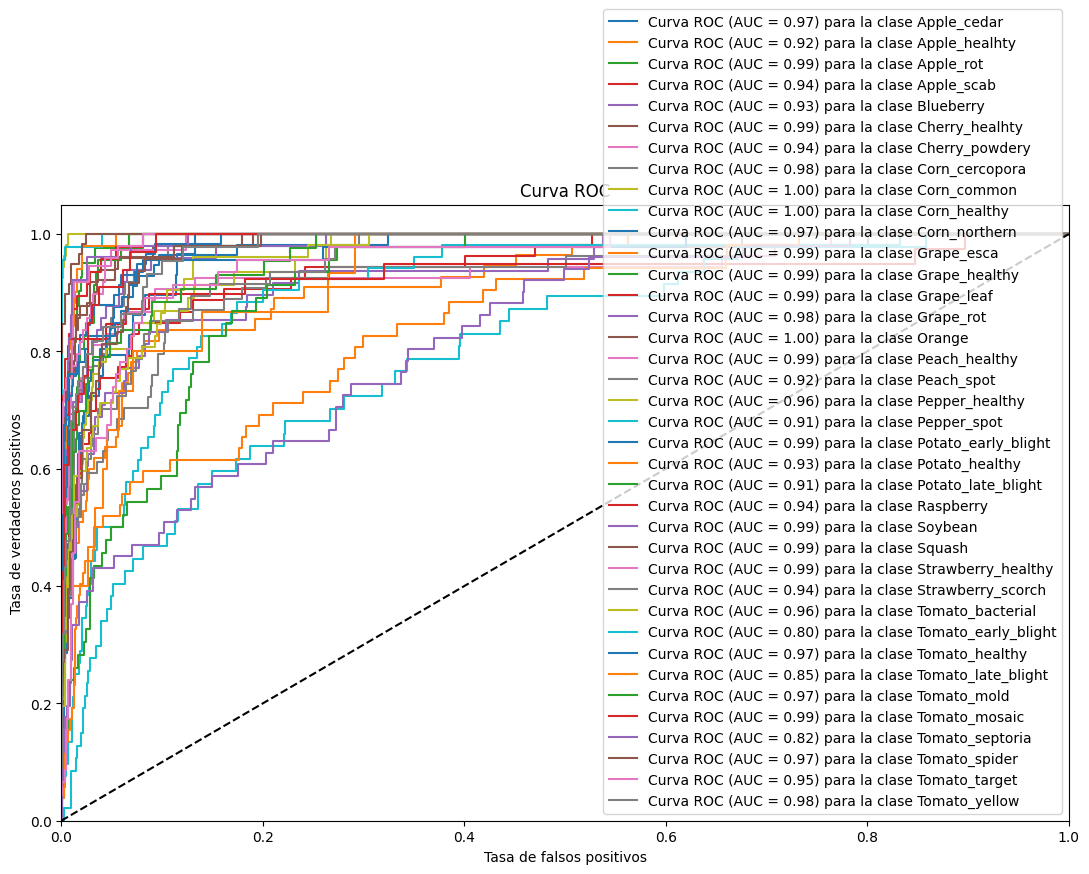

In [13]:
# Build del CNN model
cnn = build_cnn()

# Compile el CNN model
cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train CNN model
cnn.fit(X_train, y_train, epochs=15, batch_size=32, validation_split=0.2)

# Realiza las predicciones con el modelo entrenado
y_pred = cnn.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Obtiene los nombres de las clases codificados previamente
class_names = label_encoder.classes_

# Decodifica las etiquetas de prueba
y_test_decoded = label_encoder.inverse_transform(y_test)
y_pred_decoded = label_encoder.inverse_transform(y_pred_classes)

# Genera el informe de clasificación
classification_rep = classification_report(y_test_decoded, y_pred_decoded, target_names=class_names)

print(classification_rep)

# Obtener las probabilidades de predicción para cada clase
y_pred_proba = cnn.predict(X_test)

fpr = dict()  # Tasa de falsos positivos
tpr = dict()  # Tasa de verdaderos positivos
roc_auc = dict()  # Área bajo la curva (AUC)

# Calcular la curva ROC y el AUC para cada clase
for i in range(38):  # Suponiendo que tienes 4 clases
    fpr[i], tpr[i], _ = roc_curve(y_test, y_pred_proba[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Graficar la curva ROC
plt.figure(figsize=(13,8))
for i in range(38):  # Suponiendo que tienes 4 clases
    plt.plot(fpr[i], tpr[i], label='Curva ROC (AUC = %0.2f) para la clase %s' % (roc_auc[i], label_encoder.classes_[i]))
plt.plot([0, 1], [0, 1], 'k--')  # Línea diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()


Clasificador B

Epoch 1/15
448/448 [==============================] - 68s 151ms/step - loss: 0.0397 - val_loss: 0.0400
Epoch 2/15
448/448 [==============================] - 56s 126ms/step - loss: 0.0397 - val_loss: 0.0400
Epoch 3/15
448/448 [==============================] - 57s 128ms/step - loss: 0.0397 - val_loss: 0.0400
Epoch 4/15
448/448 [==============================] - 57s 128ms/step - loss: 0.0397 - val_loss: 0.0400
Epoch 5/15
448/448 [==============================] - 57s 128ms/step - loss: 0.0397 - val_loss: 0.0400
Epoch 6/15
448/448 [==============================] - 57s 128ms/step - loss: 0.0397 - val_loss: 0.0400
Epoch 7/15
448/448 [==============================] - 57s 128ms/step - loss: 0.0397 - val_loss: 0.0400
Epoch 8/15
448/448 [==============================] - 58s 130ms/step - loss: 0.0397 - val_loss: 0.0400
Epoch 9/15
448/448 [==============================] - 59s 133ms/step - loss: 0.0397 - val_loss: 0.0400
Epoch 10/15
448/448 [==============================] - 58s 130ms/step - l

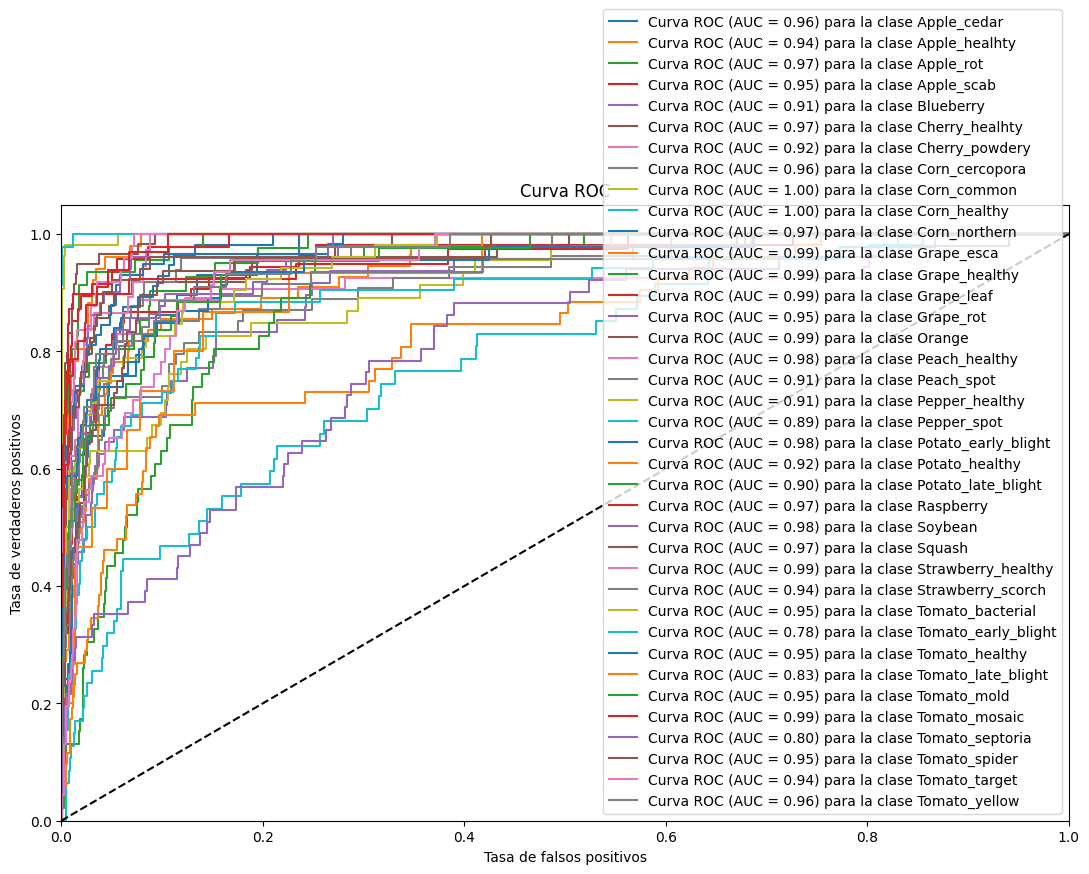

In [14]:
# Build el CNN model
cnn = build_cnn()

# Build and train the autoencoder
autoencoder = build_autoencoder(False)
autoencoder.fit(X_autoencoder, X_autoencoder, epochs=15, batch_size=32, validation_data=(X_test, X_test))

# Guardar los pesos del autoencoder en un archivo
autoencoder.save_weights('autoencoder_weights.h5')

# Load the weights of the autoencoder
cnn.load_weights('autoencoder_weights.h5', by_name=True)


# Compile the CNN model
cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the CNN model
cnn.fit(X_train, y_train, epochs=15, batch_size=32, validation_split=0.2)

# Realiza las predicciones con el modelo entrenado
y_pred = cnn.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Obtiene los nombres de las clases codificados previamente
class_names = label_encoder.classes_

# Decodifica las etiquetas de prueba
y_test_decoded = label_encoder.inverse_transform(y_test)
y_pred_decoded = label_encoder.inverse_transform(y_pred_classes)

# Genera el informe de clasificación
classification_rep = classification_report(y_test_decoded, y_pred_decoded, target_names=class_names)

print(classification_rep)

# Obtener las probabilidades de predicción para cada clase
y_pred_proba = cnn.predict(X_test)

fpr = dict()  # Tasa de falsos positivos
tpr = dict()  # Tasa de verdaderos positivos
roc_auc = dict()  # Área bajo la curva (AUC)

# Calcular la curva ROC y el AUC para cada clase
for i in range(38):  # Suponiendo que tienes 4 clases
    fpr[i], tpr[i], _ = roc_curve(y_test, y_pred_proba[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Graficar la curva ROC
plt.figure(figsize=(13,8))
for i in range(38):  # Suponiendo que tienes 4 clases
    plt.plot(fpr[i], tpr[i], label='Curva ROC (AUC = %0.2f) para la clase %s' % (roc_auc[i], label_encoder.classes_[i]))
plt.plot([0, 1], [0, 1], 'k--')  # Línea diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()


Clasificador c

Epoch 1/5
448/448 [==============================] - 476s 1s/step - loss: 0.0039 - val_loss: 0.0015
Epoch 2/5
448/448 [==============================] - 445s 992ms/step - loss: 0.0014 - val_loss: 0.0012
Epoch 3/5
448/448 [==============================] - 442s 986ms/step - loss: 0.0011 - val_loss: 0.0010
Epoch 4/5
448/448 [==============================] - 446s 995ms/step - loss: 0.0010 - val_loss: 9.3269e-04
Epoch 5/5
448/448 [==============================] - 442s 986ms/step - loss: 9.3322e-04 - val_loss: 8.6442e-04
Epoch 1/5
45/45 [==============================] - 19s 347ms/step - loss: 3.8140 - accuracy: 0.0594 - val_loss: 3.3991 - val_accuracy: 0.0919
Epoch 2/5
45/45 [==============================] - 18s 398ms/step - loss: 2.9514 - accuracy: 0.2116 - val_loss: 2.7268 - val_accuracy: 0.2451
Epoch 3/5
45/45 [==============================] - 15s 328ms/step - loss: 1.6817 - accuracy: 0.5349 - val_loss: 2.2487 - val_accuracy: 0.4039
Epoch 4/5
45/45 [==============================] -

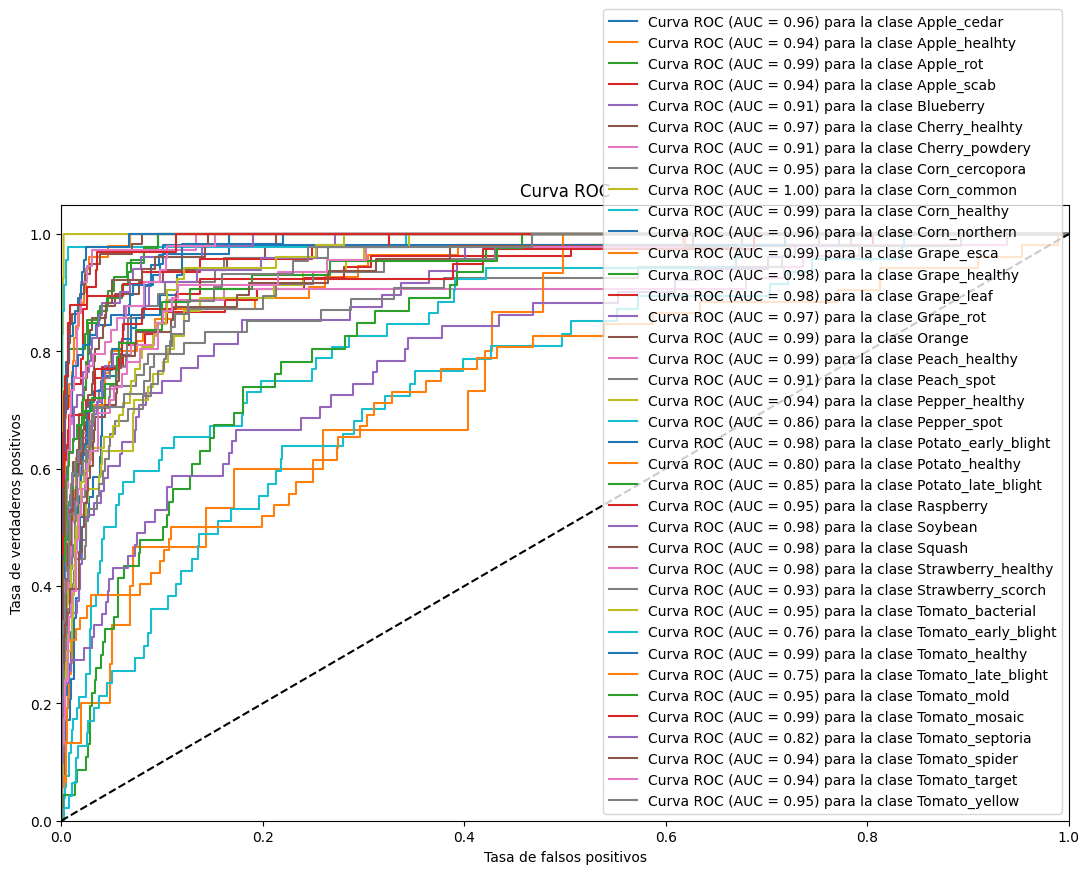

In [17]:

# Build the CNN model
cnn = build_cnn()

# Build and train the autoencoder
autoencoder = build_autoencoder(True)
autoencoder.fit(X_autoencoder, X_autoencoder, epochs=5, batch_size=32, validation_data=(X_test, X_test))

# Guardar los pesos del autoencoder en un archivo
autoencoder.save_weights('autoencoder_weights.h5')

# Load the weights of the autoencoder
cnn.load_weights('autoencoder_weights.h5', by_name=True)

# Compile the CNN model
cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the CNN model
cnn.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

# Realiza las predicciones con el modelo entrenado
y_pred = cnn.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Obtiene los nombres de las clases codificados previamente
class_names = label_encoder.classes_

# Decodifica las etiquetas de prueba
y_test_decoded = label_encoder.inverse_transform(y_test)
y_pred_decoded = label_encoder.inverse_transform(y_pred_classes)

# Genera el informe de clasificación
classification_rep = classification_report(y_test_decoded, y_pred_decoded, target_names=class_names)

print(classification_rep)

# Obtener las probabilidades de predicción para cada clase
y_pred_proba = cnn.predict(X_test)

fpr = dict()  # Tasa de falsos positivos
tpr = dict()  # Tasa de verdaderos positivos
roc_auc = dict()  # Área bajo la curva (AUC)

# Calcular la curva ROC y el AUC para cada clase
for i in range(38):  # Suponiendo que tienes 4 clases
    fpr[i], tpr[i], _ = roc_curve(y_test, y_pred_proba[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Graficar la curva ROC
plt.figure(figsize=(13,8))
for i in range(38):  # Suponiendo que tienes 4 clases
    plt.plot(fpr[i], tpr[i], label='Curva ROC (AUC = %0.2f) para la clase %s' % (roc_auc[i], label_encoder.classes_[i]))
plt.plot([0, 1], [0, 1], 'k--')  # Línea diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()


# Ejecución 2

In [18]:
# Read the data from the CSV file
data = pd.read_csv("New_Data.csv")

# Split the data into autoencoder and resto
autoencoder_data, resto_data = train_test_split(data, test_size=0.5, random_state=42)

# Extract the "Ruta" column for autoencoder
autoencoder_images = autoencoder_data["Ruta"]

# Preprocess the autoencoder images
X_autoencoder = np.array(preprocess_image_parallel(autoencoder_images))

# Split the resto data into features (X) and labels (y)
X = resto_data['Ruta']
y = resto_data['Label']

# Encode the labels as numerical values
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42, stratify=y)

# Preprocess the training and testing images
X_train = np.array(preprocess_image_parallel(X_train))
X_test = np.array(preprocess_image_parallel(X_test))

Clasificador D

Epoch 1/15
68/68 [==============================] - 24s 338ms/step - loss: 4.0574 - accuracy: 0.0535 - val_loss: 3.3135 - val_accuracy: 0.1413
Epoch 2/15
68/68 [==============================] - 24s 350ms/step - loss: 2.6232 - accuracy: 0.2980 - val_loss: 2.1925 - val_accuracy: 0.3848
Epoch 3/15
68/68 [==============================] - 23s 340ms/step - loss: 1.2775 - accuracy: 0.6327 - val_loss: 1.6753 - val_accuracy: 0.5390
Epoch 4/15
68/68 [==============================] - 23s 343ms/step - loss: 0.6291 - accuracy: 0.8208 - val_loss: 1.9061 - val_accuracy: 0.4740
Epoch 5/15
68/68 [==============================] - 25s 372ms/step - loss: 0.3079 - accuracy: 0.9176 - val_loss: 1.9765 - val_accuracy: 0.5112
Epoch 6/15
68/68 [==============================] - 23s 338ms/step - loss: 0.1504 - accuracy: 0.9628 - val_loss: 1.8825 - val_accuracy: 0.5669
Epoch 7/15
68/68 [==============================] - 23s 332ms/step - loss: 0.0562 - accuracy: 0.9884 - val_loss: 1.8513 - val_accuracy: 0.5892

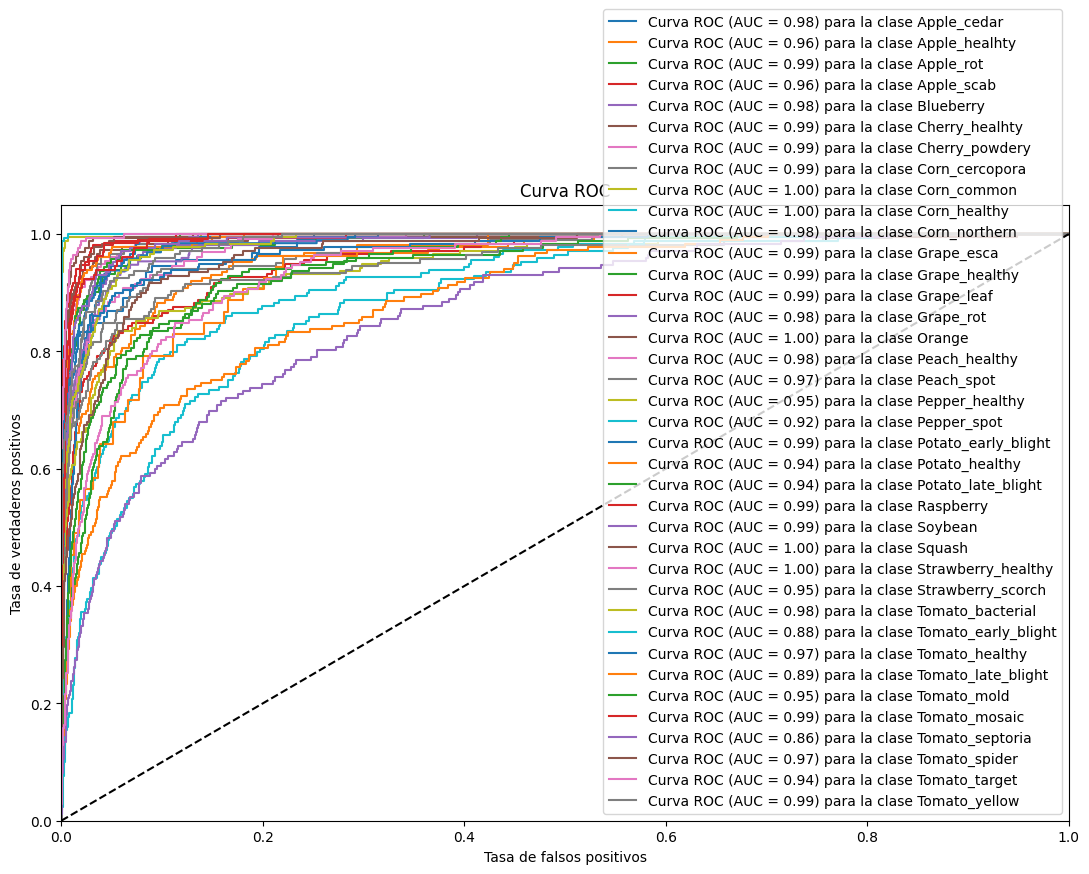

In [19]:
# Build the CNN model
cnn = build_cnn()

# Compile the CNN model
cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the CNN model
cnn.fit(X_train, y_train, epochs=15, batch_size=32, validation_split=0.2)

# Realiza las predicciones con el modelo entrenado
y_pred = cnn.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Obtiene los nombres de las clases codificados previamente
class_names = label_encoder.classes_

# Decodifica las etiquetas de prueba
y_test_decoded = label_encoder.inverse_transform(y_test)
y_pred_decoded = label_encoder.inverse_transform(y_pred_classes)

# Genera el informe de clasificación
classification_rep = classification_report(y_test_decoded, y_pred_decoded, target_names=class_names)

print(classification_rep)

# Obtener las probabilidades de predicción para cada clase
y_pred_proba = cnn.predict(X_test)

fpr = dict()  # Tasa de falsos positivos
tpr = dict()  # Tasa de verdaderos positivos
roc_auc = dict()  # Área bajo la curva (AUC)

# Calcular la curva ROC y el AUC para cada clase
for i in range(38):  # Suponiendo que tienes 4 clases
    fpr[i], tpr[i], _ = roc_curve(y_test, y_pred_proba[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Graficar la curva ROC
plt.figure(figsize=(13,8))
for i in range(38):  # Suponiendo que tienes 4 clases
    plt.plot(fpr[i], tpr[i], label='Curva ROC (AUC = %0.2f) para la clase %s' % (roc_auc[i], label_encoder.classes_[i]))
plt.plot([0, 1], [0, 1], 'k--')  # Línea diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()


Clasificador E

Epoch 1/15
280/280 [==============================] - 114s 404ms/step - loss: 0.0421 - val_loss: 0.0422
Epoch 2/15
280/280 [==============================] - 98s 349ms/step - loss: 0.0421 - val_loss: 0.0422
Epoch 3/15
280/280 [==============================] - 97s 347ms/step - loss: 0.0421 - val_loss: 0.0422
Epoch 4/15
280/280 [==============================] - 98s 349ms/step - loss: 0.0421 - val_loss: 0.0422
Epoch 5/15
280/280 [==============================] - 99s 355ms/step - loss: 0.0421 - val_loss: 0.0422
Epoch 6/15
280/280 [==============================] - 99s 356ms/step - loss: 0.0421 - val_loss: 0.0422
Epoch 7/15
280/280 [==============================] - 106s 381ms/step - loss: 0.0421 - val_loss: 0.0422
Epoch 8/15
280/280 [==============================] - 99s 356ms/step - loss: 0.0421 - val_loss: 0.0422
Epoch 9/15
280/280 [==============================] - 97s 346ms/step - loss: 0.0421 - val_loss: 0.0422
Epoch 10/15
280/280 [==============================] - 99s 353ms/step -

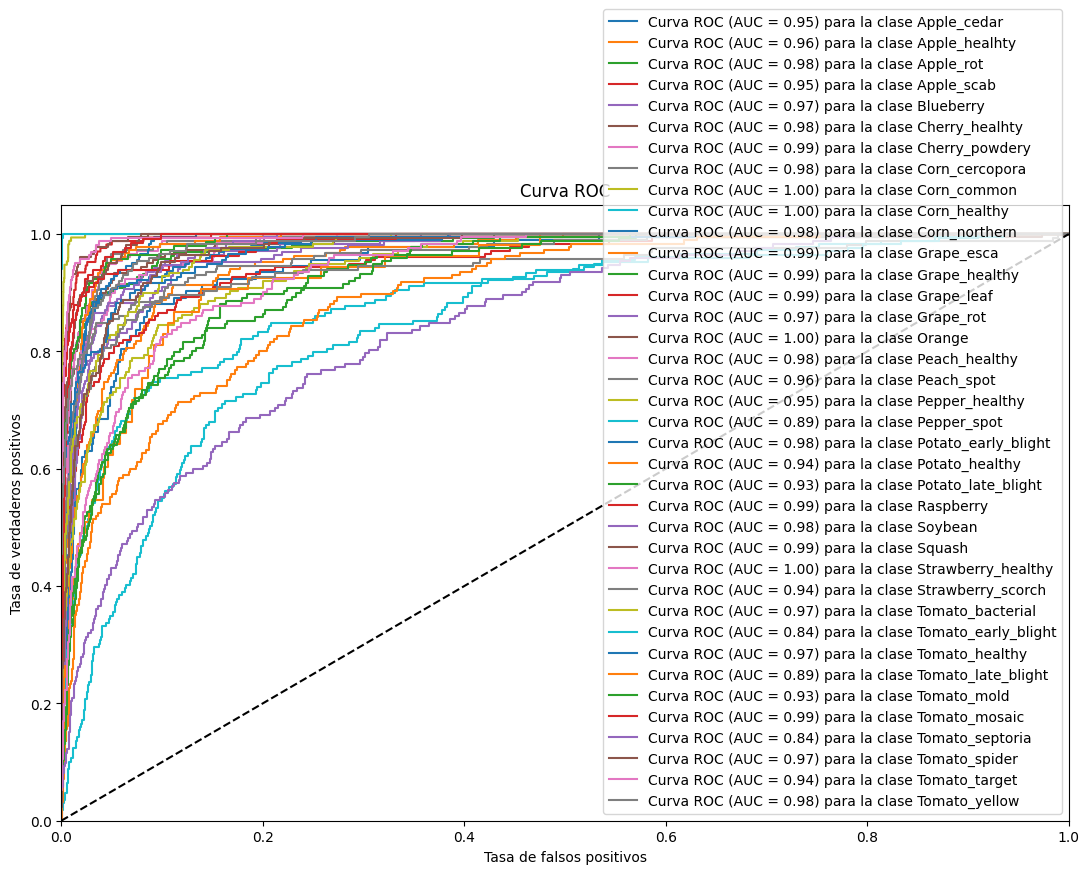

In [20]:
# Build the CNN model
cnn = build_cnn()

# Build and train the autoencoder
autoencoder = build_autoencoder(False)
autoencoder.fit(X_autoencoder, X_autoencoder, epochs=15, batch_size=32, validation_data=(X_test, X_test))

# Guardar los pesos del autoencoder en un archivo
autoencoder.save_weights('autoencoder_weights.h5')

# Load the weights of the autoencoder
cnn.load_weights('autoencoder_weights.h5', by_name=True)


# Compile the CNN model
cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the CNN model
cnn.fit(X_train, y_train, epochs=15, batch_size=32, validation_split=0.2)

# Realiza las predicciones con el modelo entrenado
y_pred = cnn.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Obtiene los nombres de las clases codificados previamente
class_names = label_encoder.classes_

# Decodifica las etiquetas de prueba
y_test_decoded = label_encoder.inverse_transform(y_test)
y_pred_decoded = label_encoder.inverse_transform(y_pred_classes)

# Genera el informe de clasificación
classification_rep = classification_report(y_test_decoded, y_pred_decoded, target_names=class_names)

print(classification_rep)

# Obtener las probabilidades de predicción para cada clase
y_pred_proba = cnn.predict(X_test)

fpr = dict()  # Tasa de falsos positivos
tpr = dict()  # Tasa de verdaderos positivos
roc_auc = dict()  # Área bajo la curva (AUC)

# Calcular la curva ROC y el AUC para cada clase
for i in range(38):  # Suponiendo que tienes 4 clases
    fpr[i], tpr[i], _ = roc_curve(y_test, y_pred_proba[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Graficar la curva ROC
plt.figure(figsize=(13,8))
for i in range(38):  # Suponiendo que tienes 4 clases
    plt.plot(fpr[i], tpr[i], label='Curva ROC (AUC = %0.2f) para la clase %s' % (roc_auc[i], label_encoder.classes_[i]))
plt.plot([0, 1], [0, 1], 'k--')  # Línea diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()


Clasificador F

Epoch 1/5
280/280 [==============================] - 344s 1s/step - loss: 0.0048 - val_loss: 0.0018
Epoch 2/5
280/280 [==============================] - 324s 1s/step - loss: 0.0017 - val_loss: 0.0013
Epoch 3/5
280/280 [==============================] - 326s 1s/step - loss: 0.0013 - val_loss: 0.0012
Epoch 4/5
280/280 [==============================] - 328s 1s/step - loss: 0.0012 - val_loss: 0.0011
Epoch 5/5
280/280 [==============================] - 322s 1s/step - loss: 0.0011 - val_loss: 9.7274e-04
Epoch 1/5
68/68 [==============================] - 25s 352ms/step - loss: 3.6987 - accuracy: 0.0866 - val_loss: 2.9486 - val_accuracy: 0.2602
Epoch 2/5
68/68 [==============================] - 22s 330ms/step - loss: 2.2395 - accuracy: 0.3869 - val_loss: 2.1578 - val_accuracy: 0.4126
Epoch 3/5
68/68 [==============================] - 23s 331ms/step - loss: 1.3700 - accuracy: 0.5982 - val_loss: 1.7020 - val_accuracy: 0.5335
Epoch 4/5
68/68 [==============================] - 23s 343ms/step - lo

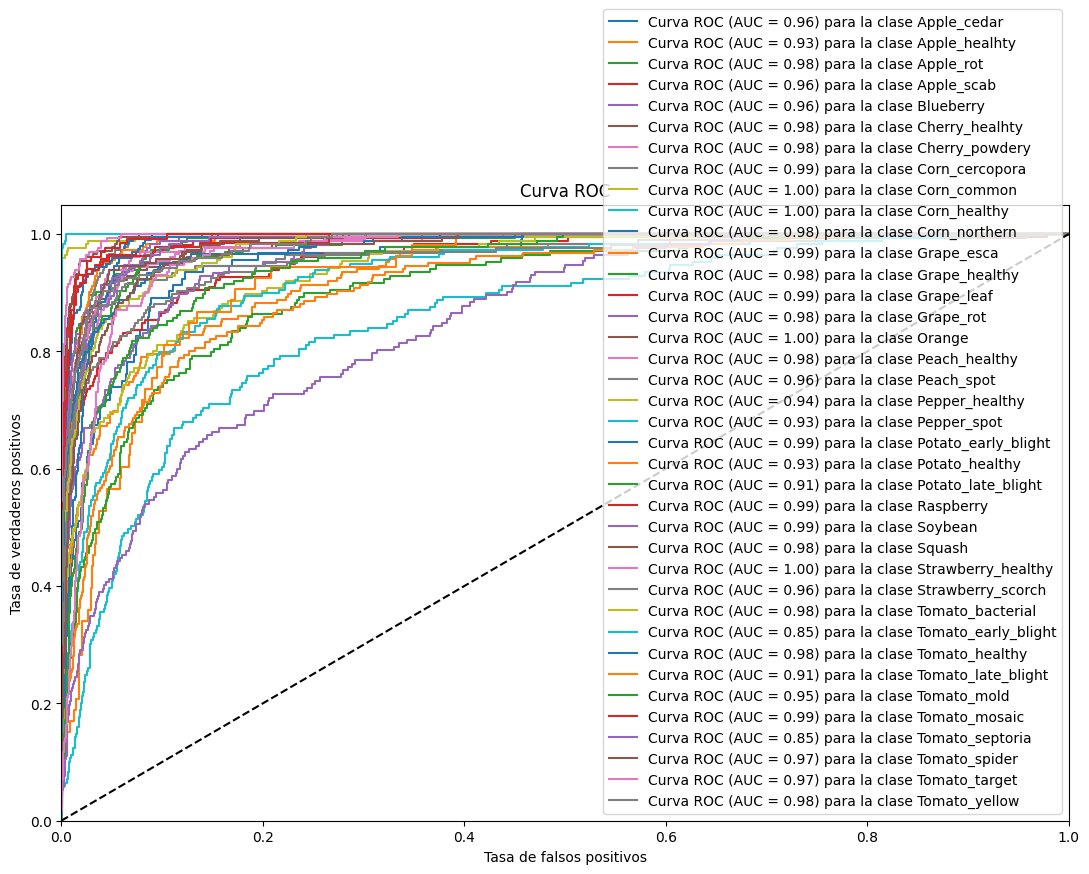

In [23]:

# Build the CNN model
cnn = build_cnn()

# Build and train the autoencoder
autoencoder = build_autoencoder(True)
autoencoder.fit(X_autoencoder, X_autoencoder, epochs=5, batch_size=32, validation_data=(X_test, X_test))

# Guardar los pesos del autoencoder en un archivo
autoencoder.save_weights('autoencoder_weights.h5')

# Load the weights of the autoencoder
cnn.load_weights('autoencoder_weights.h5', by_name=True)

# Compile the CNN model
cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the CNN model
cnn.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

# Realiza las predicciones con el modelo entrenado
y_pred = cnn.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Obtiene los nombres de las clases codificados previamente
class_names = label_encoder.classes_

# Decodifica las etiquetas de prueba
y_test_decoded = label_encoder.inverse_transform(y_test)
y_pred_decoded = label_encoder.inverse_transform(y_pred_classes)

# Genera el informe de clasificación
classification_rep = classification_report(y_test_decoded, y_pred_decoded, target_names=class_names)

print(classification_rep)

# Obtener las probabilidades de predicción para cada clase
y_pred_proba = cnn.predict(X_test)

fpr = dict()  # Tasa de falsos positivos
tpr = dict()  # Tasa de verdaderos positivos
roc_auc = dict()  # Área bajo la curva (AUC)

# Calcular la curva ROC y el AUC para cada clase
for i in range(38):  # Suponiendo que tienes 4 clases
    fpr[i], tpr[i], _ = roc_curve(y_test, y_pred_proba[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Graficar la curva ROC
plt.figure(figsize=(13,8))
for i in range(38):  # Suponiendo que tienes 4 clases
    plt.plot(fpr[i], tpr[i], label='Curva ROC (AUC = %0.2f) para la clase %s' % (roc_auc[i], label_encoder.classes_[i]))
plt.plot([0, 1], [0, 1], 'k--')  # Línea diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()
